<a href="https://colab.research.google.com/github/smedegaard/krafthack/blob/main/krafthack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Krafthack 2022
Authors and developers: Anders Pedersen and Håkon Holte

In [1]:
try:
  import colab
  !pip install --upgrade pip
except:
  pass

     |████████████████████████████████| 2.1 MB 25.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [2]:
!mkdir training_data
!gsutil cp gs://krafthack-2022-data/input_dataset_2.parquet training_data/

Copying gs://krafthack-2022-data/input_dataset_2.parquet...
/ [1 files][257.3 MiB/257.3 MiB]                                                
Operation completed over 1 objects/257.3 MiB.                                    


# Data Exploration

In [3]:
# Import necessary packages and set some global parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 10)

In [4]:
# Get and view dataset - needs path to dataset
dataset_df = pd.read_parquet('/content/training_data/input_dataset_2.parquet')
dataset_df.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,mode,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
timepoints,,,,,,,,,,,,,,,,,,,,,
1970-12-19 09:51:44,262.204308,2.899036,82.279976,173.955216,5310.799181,107.964278,operation,4.133996,1598.481390,1480.989917,...,1635.585700,1674.848803,175.758460,163.956613,146.288741,225.535170,297.780208,161.148100,NaN,NaN
1970-12-19 09:51:45,262.104319,3.344630,82.277248,173.989815,5311.219755,107.964273,operation,4.134078,1598.477449,1480.989528,...,1635.588478,1674.823883,175.755164,163.951680,146.284164,225.527142,297.771627,161.145094,NaN,NaN
1970-12-19 09:51:46,262.004330,3.790223,82.274520,174.024413,5311.640329,107.964269,operation,4.134731,1598.479316,1481.003188,...,1635.583464,1674.841318,175.764601,163.952007,146.283423,225.522291,297.777115,161.144487,NaN,NaN
1970-12-19 09:51:47,261.904340,4.235817,82.271792,174.059012,5312.060902,107.964264,operation,4.134270,1598.490184,1481.028827,...,1635.581384,1674.843245,175.763157,163.953924,146.283633,225.535827,297.772578,161.144037,NaN,NaN
1970-12-19 09:51:48,261.804351,4.064759,82.269064,174.153819,5312.405938,107.964259,operation,4.133583,1598.494073,1481.059017,...,1635.591746,1674.872300,175.760959,163.951968,146.286946,225.534231,297.774191,161.151967,NaN,NaN


In [5]:
# Get relevant facts about dataset
n_rows = len(dataset_df)
n_cols = len(dataset_df.columns)

# Get count, mean and other relevant statistics
dataset_description = dataset_df.describe()

print("Dataset consists of:\n", n_rows, "rows\n", n_cols, "columns\n")
print("Description of dataset:\n", dataset_description)

Dataset consists of:
 1874087 rows
 22 columns

Description of dataset:
        Unit_4_Power  Unit_4_Reactive Power  Turbine_Guide Vane Opening  \
count  1.750000e+06           1.750000e+06                1.750000e+06   
mean   2.977542e+02           5.989380e+00                9.105910e+01   
std    3.387414e+01           8.155810e+00                8.714153e+00   
min    0.000000e+00          -3.811665e+01                0.000000e+00   
25%    3.069059e+02           0.000000e+00                9.331226e+01   
50%    3.098457e+02           6.300167e+00                9.404115e+01   
75%    3.112799e+02           1.117088e+01                9.448438e+01   
max    3.233023e+02           4.910232e+01                9.618052e+01   

       Turbine_Pressure Drafttube  Turbine_Pressure Spiral Casing  \
count                1.750000e+06                    1.750000e+06   
mean                 1.577165e+02                    5.312681e+03   
std                  1.909088e+01                    

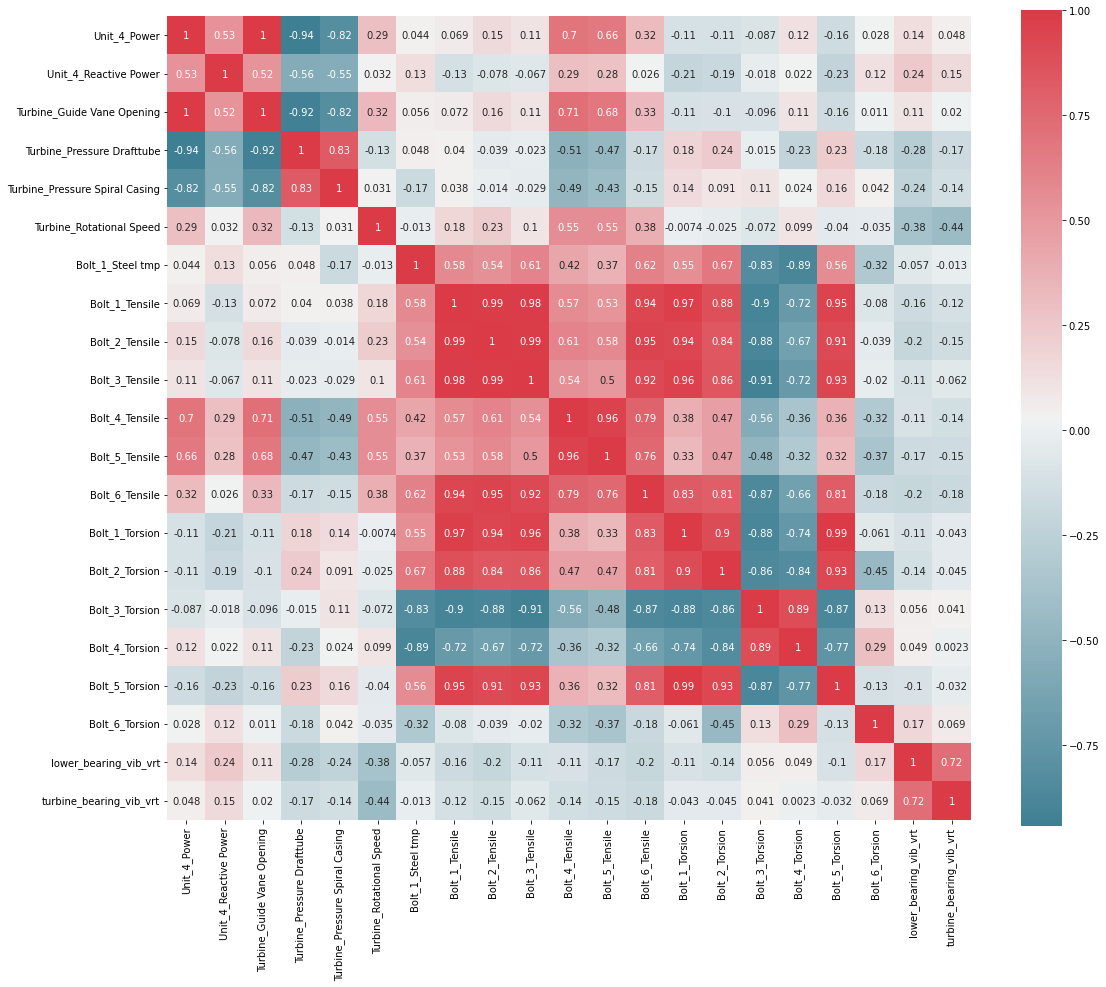

In [6]:
# Create correlation plot to consider correlations between variables
dataset_corr = dataset_df.corr()

fig, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(dataset_corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

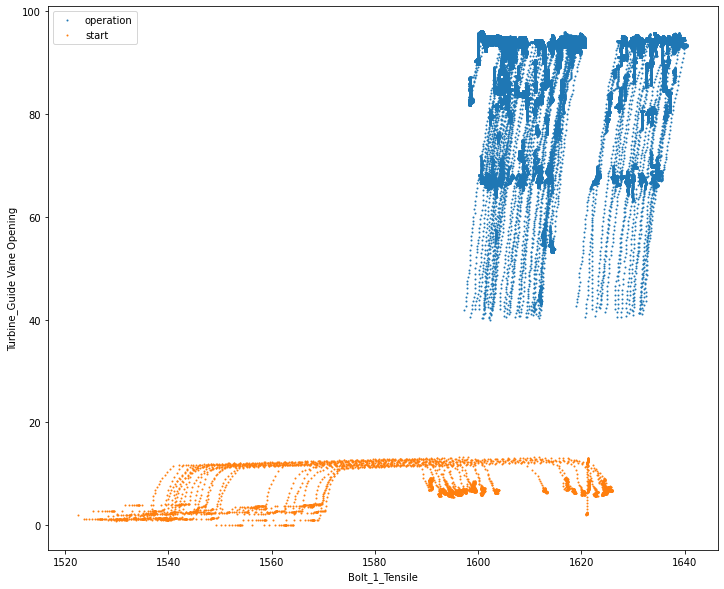

In [7]:
# Change x_var and y_var to desired variables to make scatterplots grouped by mode (start or operational)
x_var = "Bolt_1_Tensile"
y_var = "Turbine_Guide Vane Opening"
by_var = "mode"
groups = dataset_df.groupby(by_var)
fig, ax = plt.subplots(figsize=(12, 10))
for name, group in groups:
  plt.plot(group[x_var], group[y_var], marker='o', linestyle='', markersize=1, label=name)
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
plt.legend()

# Data Preparation

In [8]:
# Import necessary packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import math
import warnings as wgs

In [9]:
# Variables not to be included as features
drop_vars = ['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile', 'Bolt_5_Tensile', 'Bolt_6_Tensile', 
             'Bolt_1_Torsion', 'Bolt_2_Torsion', 'Bolt_3_Torsion', 'Bolt_4_Torsion', 'Bolt_5_Torsion', 'Bolt_6_Torsion', 
             'Bolt_1_Steel tmp', 'mode']

# Create mode indicator variable
dataset_df['is_mode_start'] = (dataset_df['mode'] == 'start') * 1

In [10]:
# Remove null values. For this, vibration variables are removed from the dataset, as these have many occurences of null values
X_clean = dataset_df.drop(['lower_bearing_vib_vrt',	'turbine_bearing_vib_vrt'], axis=1).dropna()

In [11]:
# Custom data split function to split data into equally sized chunks
def split_dataframe(df, chunk_size = 10000): 
    chunks = list()
    num_chunks = math.ceil(len(df) / chunk_size)
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

In [12]:
# Use split_dataframe function to split datafram into chunks with chunk_size elements in each chunk
chunk_size = 10000
df_chunks = pd.Series(split_dataframe(X_clean, chunk_size))

In [13]:
# Set size of training data set and shuffle chunk indices
train_size = 0.8
shuffled_idxs = np.arange(0, len(df_chunks), 1)
np.random.shuffle(shuffled_idxs)

# Set chunks to be placed in train, validation and test set
train_chunks_temp = shuffled_idxs[:math.ceil(train_size*len(shuffled_idxs))]
test_chunks = shuffled_idxs[math.ceil(train_size*len(shuffled_idxs)):]
train_chunks = train_chunks_temp[:math.ceil((2-1/train_size)*len(train_chunks_temp))]
val_chunks = train_chunks_temp[math.ceil((2-1/train_size)*len(train_chunks_temp)):]

# Set training, validation and test data
train_data = pd.concat(list(df_chunks[train_chunks]))
val_data = pd.concat(list(df_chunks[val_chunks]))
test_data = pd.concat(list(df_chunks[test_chunks]))

# Set up train, validation and test feature dataframes
X_train = train_data.drop(drop_vars, inplace=False, axis=1)
X_val = val_data.drop(drop_vars, inplace=False, axis=1)
X_test = test_data.drop(drop_vars, inplace=False, axis=1)

# Set up train, validation and test target dataframes
y_train_df = train_data[['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile', 'Bolt_5_Tensile', 'Bolt_6_Tensile']]
y_val_df = val_data[['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile', 'Bolt_5_Tensile', 'Bolt_6_Tensile']]
y_test_df = test_data[['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile', 'Bolt_5_Tensile', 'Bolt_6_Tensile']]

In [14]:
# Scaling features for using chunk split
with wgs.catch_warnings():
  wgs.simplefilter("ignore")
  scaler1 = MinMaxScaler()
  scaler2 = MinMaxScaler((-1, 1))
  keep_vars = dataset_df.columns.drop([*drop_vars, 'Unit_4_Reactive Power', 'is_mode_start', 'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt'])
  for keep_var in keep_vars:
    scaler1.fit(X_train[[keep_var]])
    X_train[[keep_var]] = scaler1.transform(X_train[[keep_var]])
    X_val[[keep_var]] = scaler1.transform(X_val[[keep_var]])
    X_test[[keep_var]] = scaler1.transform(X_test[[keep_var]])
  scaler2.fit(X_train[['Unit_4_Reactive Power']])
  X_train[['Unit_4_Reactive Power']] = scaler2.transform(X_train[['Unit_4_Reactive Power']])
  X_val[['Unit_4_Reactive Power']] = scaler2.transform(X_val[['Unit_4_Reactive Power']])
  X_test[['Unit_4_Reactive Power']] = scaler2.transform(X_test[['Unit_4_Reactive Power']])

# Verify that values are scaled
X_train.head()

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,is_mode_start
timepoints,,,,,,,
1970-12-25 00:20:44,0.961084,-0.033809,0.983514,0.106897,0.886831,0.996605,0
1970-12-25 00:20:45,0.961104,-0.037356,0.983510,0.106942,0.886884,0.996605,0
1970-12-25 00:20:46,0.961125,-0.040904,0.983506,0.106988,0.886936,0.996605,0
1970-12-25 00:20:47,0.961146,-0.044452,0.983503,0.107034,0.886988,0.996605,0
1970-12-25 00:20:48,0.961166,-0.048000,0.983499,0.107009,0.887035,0.996605,0


In [15]:
# Scaling targets. As above, the test targets are scaled using the same scaler as the train targets. A seperate scaler is fitted for each of the six bolt tensil columns
# Scaling targets for using chunk split
with wgs.catch_warnings():
  wgs.simplefilter("ignore")
  y_scalers = [MinMaxScaler() for i in range(0, 6)]
  for i in range(0, 6):
    col_i = y_train_df[y_train_df.columns[i]]
    y_scalers[i].fit(col_i.values.reshape(-1, 1))
    y_train_df[y_train_df.columns[i]] = y_scalers[i].transform(col_i.values.reshape(-1, 1))
    y_val_df[y_val_df.columns[i]] = y_scalers[i].transform(y_val_df[y_val_df.columns[i]].values.reshape(-1, 1))
    y_test_df[y_test_df.columns[i]] = y_scalers[i].transform(y_test_df[y_test_df.columns[i]].values.reshape(-1, 1))

# Verify that values are scaled
y_train_df.head()

,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile
timepoints,,,,,,
1970-12-25 00:20:44,0.698753,0.747601,0.539108,0.896171,0.892253,0.788021
1970-12-25 00:20:45,0.698825,0.747755,0.539179,0.896293,0.892409,0.787980
1970-12-25 00:20:46,0.698788,0.747632,0.539315,0.896193,0.892111,0.787950
1970-12-25 00:20:47,0.698744,0.747642,0.539431,0.896438,0.892530,0.788005
1970-12-25 00:20:48,0.698845,0.747869,0.539785,0.896440,0.892735,0.787926


# Model Training

In [16]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from keras.regularizers import l2, l1

In [17]:
# Convert to tensors for chunk data
X_train_chunks = pd.Series(split_dataframe(X_train, chunk_size))
X_train_tensors = [tf.convert_to_tensor(chunk) for chunk in X_train_chunks]

y_train_chunks = pd.Series(split_dataframe(y_train_df, chunk_size))
y_train_tensors = [tf.convert_to_tensor(chunk) for chunk in y_train_chunks]

X_val_tensor = tf.convert_to_tensor(X_val)
y_val_tensor = tf.convert_to_tensor(y_val_df[y_val_df.columns[0]])

In [18]:
# Set some hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32 #16
LEARNING_RATE = 0.01
REGULARIZATION_PARAM = 0.02
LOSS_FUNC = tf.keras.losses.MeanSquaredError()
METRIC_NAME = 'MSE'
DROPOUT_RATE = 0.1

# Define fully connected network
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.Input(shape=(7,)))
model1.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(REGULARIZATION_PARAM), bias_regularizer=l1(REGULARIZATION_PARAM),
                                  kernel_initializer=tf.keras.initializers.GlorotNormal(), bias_initializer=tf.keras.initializers.TruncatedNormal(mean=0.1, stddev=0.1)))
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(REGULARIZATION_PARAM), bias_regularizer=l1(REGULARIZATION_PARAM),
                                  kernel_initializer=tf.keras.initializers.GlorotNormal(), bias_initializer=tf.keras.initializers.TruncatedNormal(mean=0.1, stddev=0.1)))
model1.add(tf.keras.layers.Dense(1, activation='relu'))
model1.output_shape

(None, 1)

In [19]:
# Configure early stopping
MIN_DELTA = 0
PATIENCE = 5

# Helper function for checking validation loss and early stopping
def check_loss_and_early_stopping(val_loss_history, best_val_loss, es_counter, best_model_idx, model_idx):
    if (len(val_loss_history) == 1):
      best_val_loss = val_loss_history[0]
    elif ((val_loss_history[-1] - best_val_loss) >= -MIN_DELTA):
      es_counter += 1
    else:
      es_counter = 0
      best_val_loss = val_loss_history[-1]
      best_model_idx = model_idx
    return best_val_loss, es_counter, best_model_idx

In [20]:
# Set metrics for monitoring validation loss
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
loss = mean_squared_error
if METRIC_NAME == 'MAPE':
  loss = mean_absolute_percentage_error

In [21]:
# Compile model and view summary
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
              loss=LOSS_FUNC,
              metrics=['mse', 'mape'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train fully connected model for bolt 1 with chunks
history = 0
es_counter = 0
best_val_loss = 100
best_model_idx = 0
val_loss_history = []
model_history = []

for epoch in range(NUM_EPOCHS):
  if es_counter > PATIENCE:
    print("Patience reached, stopping early at epoch #{}".format(epoch))
    break
  print('epoch #{}'.format(epoch))
  for i in range(0, len(X_train_tensors)):
    model_history.append(model1.fit(x=X_train_tensors[i], y=y_train_tensors[i][:, 0], batch_size=BATCH_SIZE))
    if (i%7 == 0 and i != 0):
      print("Scoring validation set...")
      val_preds = model1.predict(X_val_tensor)
      print("Calculating loss...")
      val_loss_history.append(loss(y_val_tensor, val_preds))
      print("Checking loss and early stopping...")
      best_val_loss, es_counter, best_model_idx = check_loss_and_early_stopping(val_loss_history, best_val_loss, es_counter, best_model_idx, 
                                                                                i+epoch*len(X_train_tensors))
      print("Current validation loss:", val_loss_history[-1])
      print("Best validation loss:", best_val_loss)
      print("Early stopping counter:", es_counter)
      if es_counter > PATIENCE:
        break


epoch #0
313/313 [==============================] - 0s 1ms/step - loss: 0.1748 - mse: 1.9520e-05 - mape: 0.6492
Scoring validation set...
Calculating loss...
Checking loss and early stopping...
Current validation loss: 0.018786074808029674
Best validation loss: 0.018786074808029674
Early stopping counter: 0
313/313 [==============================] - 0s 1ms/step - loss: 0.0339 - mse: 7.8849e-04 - mape: 1.8418
Scoring validation set...
Calculating loss...
Checking loss and early stopping...
Current validation loss: 0.011145350964322932
Best validation loss: 0.011145350964322932
Early stopping counter: 0
313/313 [==============================] - 0s 1ms/step - loss: 0.0073 - mse: 4.5093e-04 - mape: 1.1850
Scoring validation set...
Calculating loss...
Checking loss and early stopping...
Current validation loss: 0.010797614186351251
Best validation loss: 0.010797614186351251
Early stopping counter: 0
313/313 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 8.7791e-06 - m

# Evaluate and save Model

In [23]:
# Get the best model
best_model = model_history[best_model_idx].model

In [24]:
# Score model on test set
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test_df[y_test_df.columns[0]])

y_pred = best_model.predict(X_test_tensor)

print('mse:', mean_squared_error(y_test_tensor, y_pred), 'mape:', mean_absolute_percentage_error(y_test_tensor, y_pred))

mse: 0.014740869090528507 mape: 0.11972247437736803


In [28]:
# Save the model
savepath = "/content/models/" + model_name
tf.keras.models.save_model(best_model, filepath=savepath)

INFO:tensorflow:Assets written to: /content/models/dense-1/assets


In [32]:
!gsutil cp -r "/content/models/" + model_name gs://krafthack-2022-data/models

Copying file:///content/models/dense-1/keras_metadata.pb [Content-Type=application/octet-stream]...
Copying file:///content/models/dense-1/saved_model.pb [Content-Type=application/octet-stream]...
Copying file:///content/models/dense-1/variables/variables.index [Content-Type=application/octet-stream]...
Copying file:///content/models/dense-1/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
CommandException: No URLs matched: +
